In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns     # 데이터 시각화
import missingno as msno  # 결측치

In [15]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])   # datetime 형태로
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [20]:
print('데이터 구조는:', df.shape)
print('데이터 타입은:', df.dtypes)
print('데이터 칼럼은:', df.columns)

데이터 구조는: (17414, 10)
데이터 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터 칼럼은: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [21]:
# 결측치

df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        timestamp    cnt     t1     t2    hum  wind_speed  weather_code  \
0          False  False  False  False  False       False         False   
1          False  False  False  False  False       False         False   
2          False  False  False  False  False       False         False   
3          False  False  False  False  False       False         False   
4          False  False  False  False  False       False         False   
...          ...    ...    ...    ...    ...         ...           ...   
17409      False  False  False  False  False       False         False   
17410      False  False  False  False  False       False         False   
17411      False  False  False  False  False       False         False   
17412      False  False  False  False  False       False         False   
17413      False  False  False  False  False       False         False   

       is_holiday  is_weekend  season  
0        

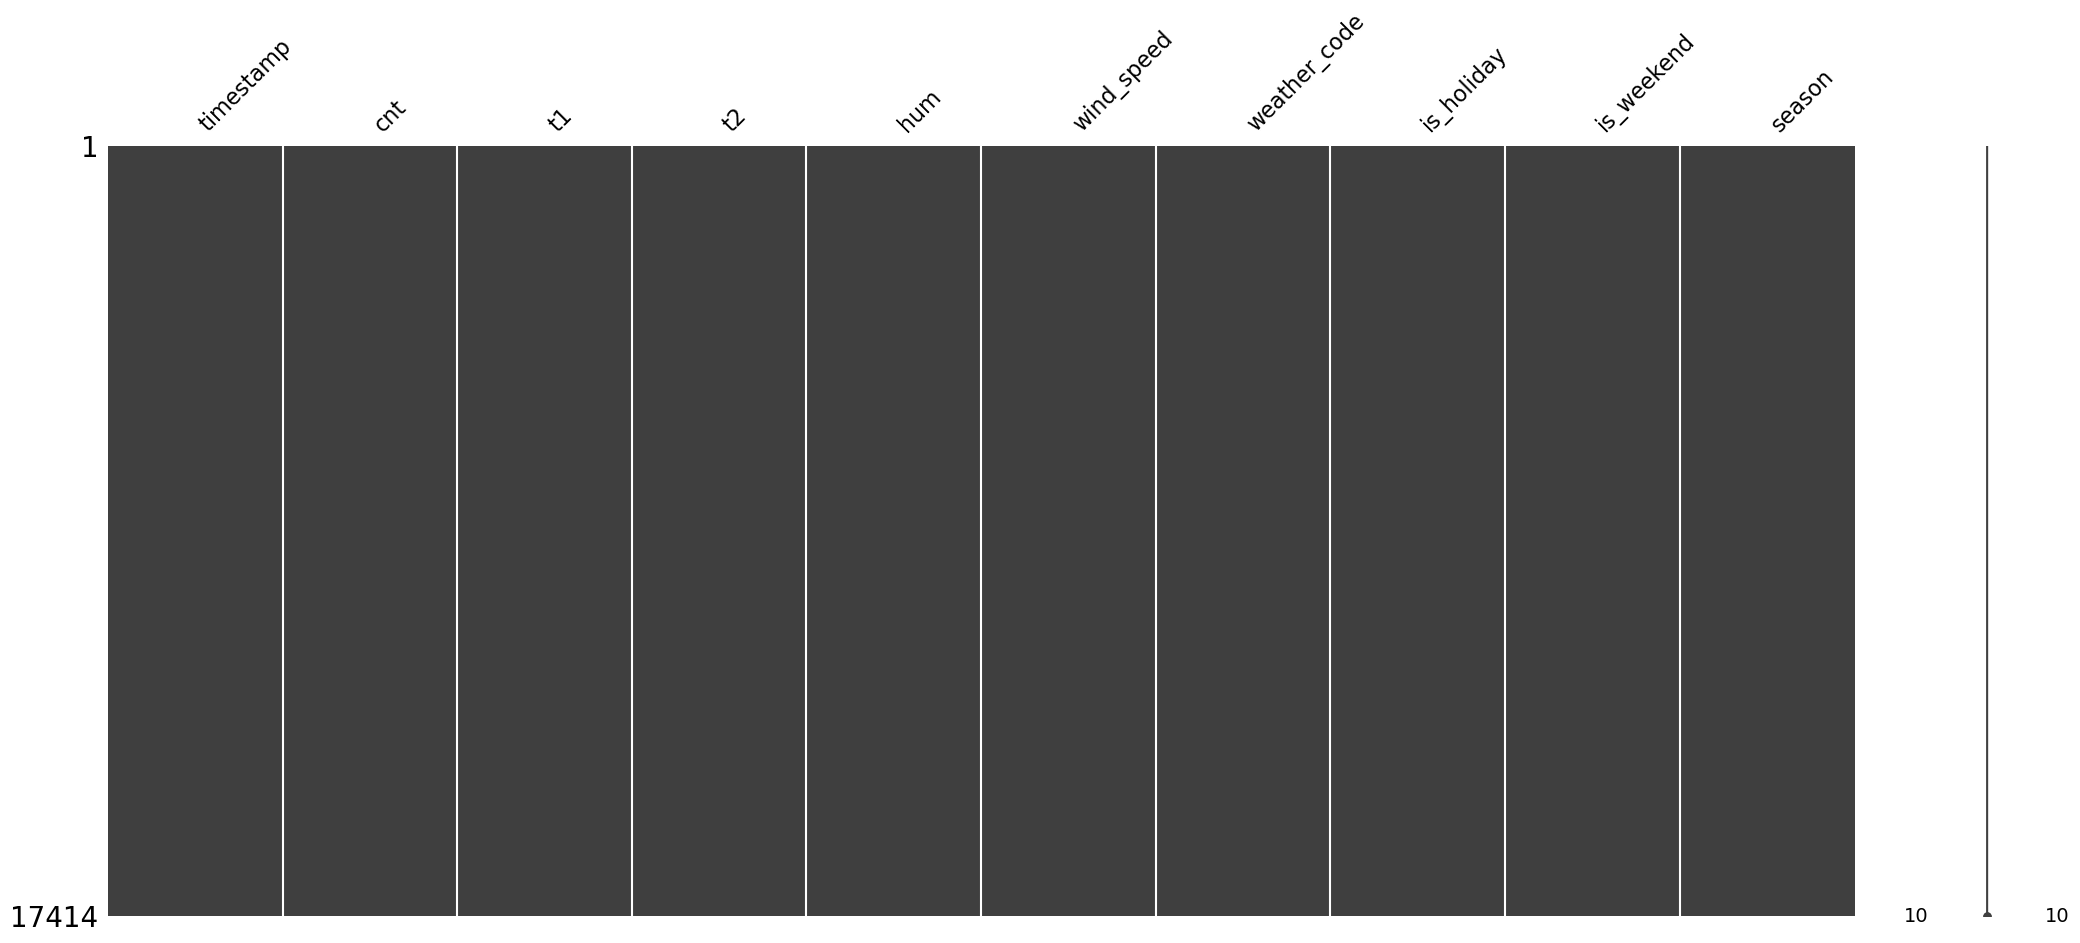

In [25]:
# 결측치 그래프
msno.matrix(df)
plit.show()

In [29]:
# 연/월/요일

f['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [33]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [34]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

In [37]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

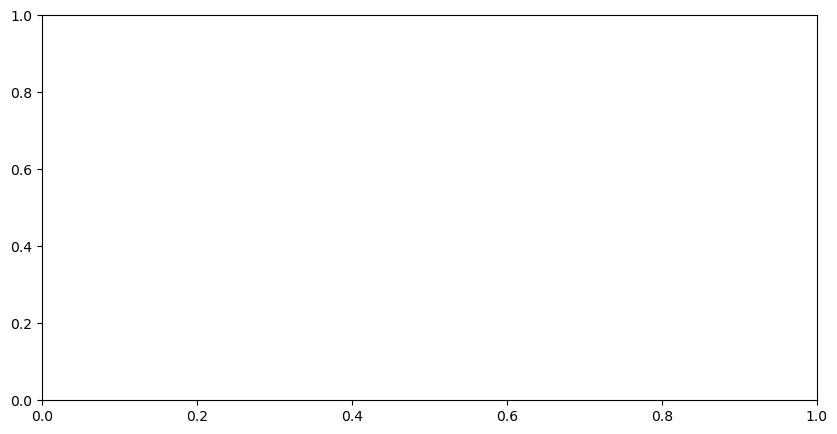

In [45]:
a, b = plt.subplots(1,1, figsize=(10, 5))  # 그래프 사이즈
sns.boxplot(df['year'], df['cnt'])

<Axes: xlabel='year', ylabel='cnt'>

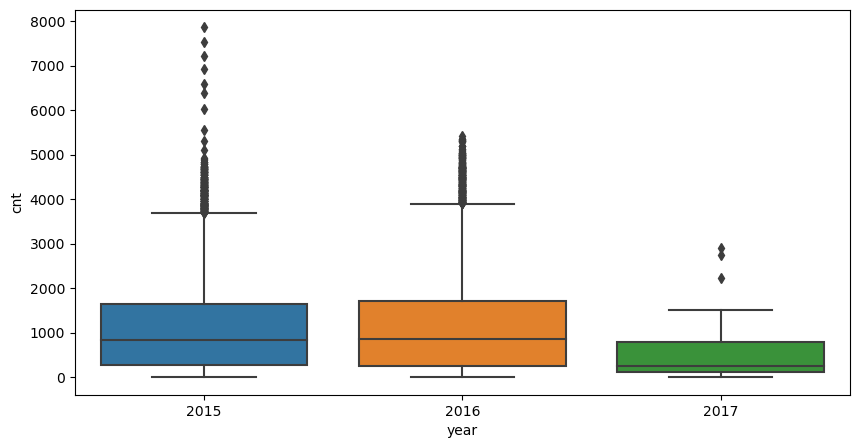

In [46]:
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x=df['year'], y=df['cnt'])

# max 값 초과 구간 = 이상치
# 자전거 이용자 점점 줄어듦

<Axes: xlabel='month', ylabel='cnt'>

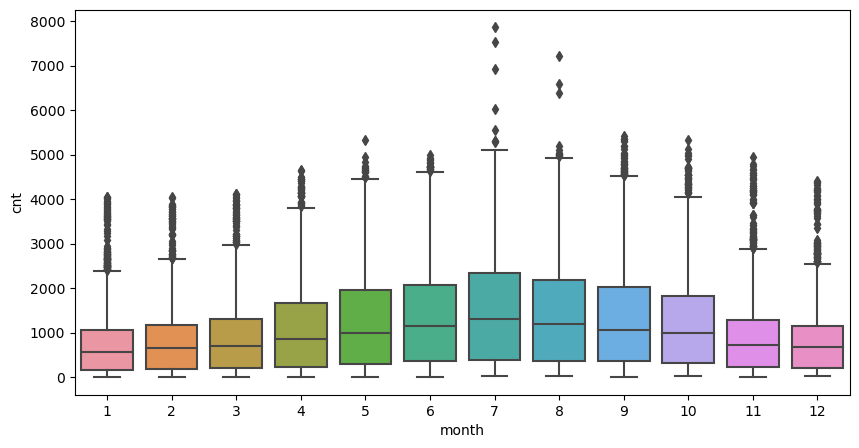

In [48]:
# 월별
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['cnt'])

<Axes: xlabel='dayofweek', ylabel='cnt'>

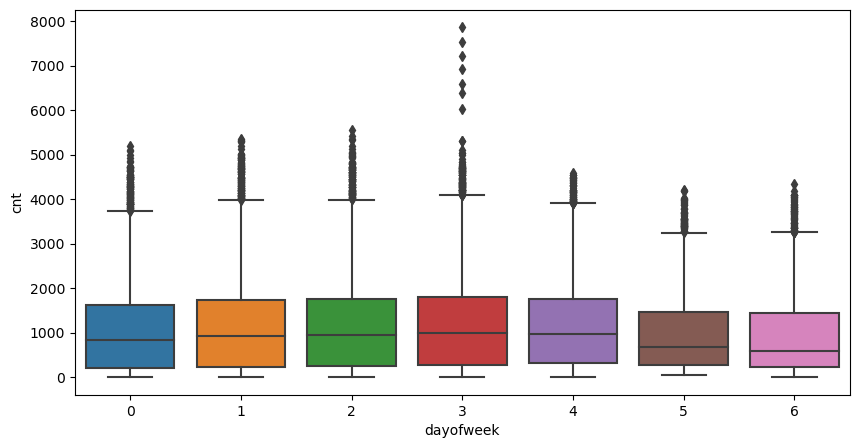

In [49]:
# 요일
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x=df['dayofweek'], y=df['cnt'])

# 토/일이 오히려 감소

<Axes: xlabel='hour', ylabel='cnt'>

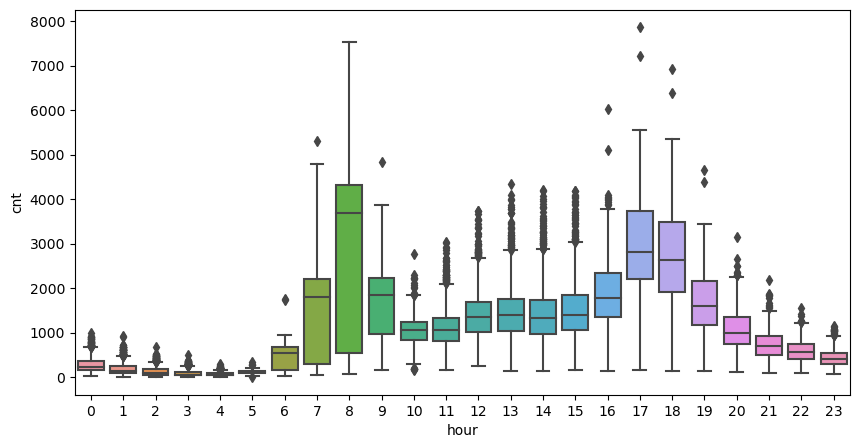

In [50]:
# 시간대 별
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x=df['hour'], y=df['cnt'])

In [59]:
# 그래프 함수 만들기

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='coolwarm', orient='v')  # bar graph
    # palette thema
    # orient: “v” / “h”. -> Orientation of the plot (vertical or horizontal)

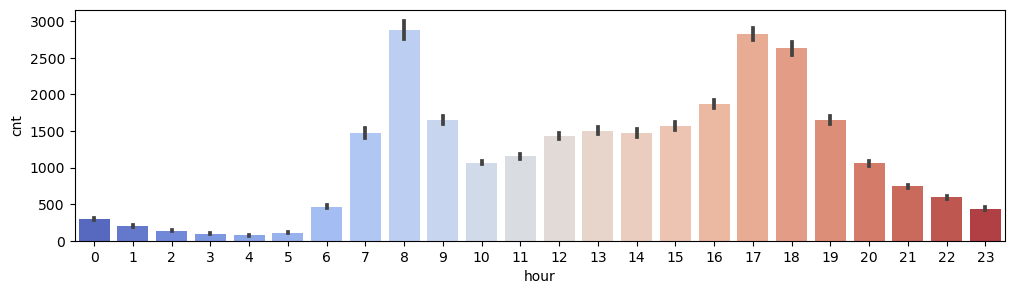

In [60]:
plot_bar(df, 'hour')

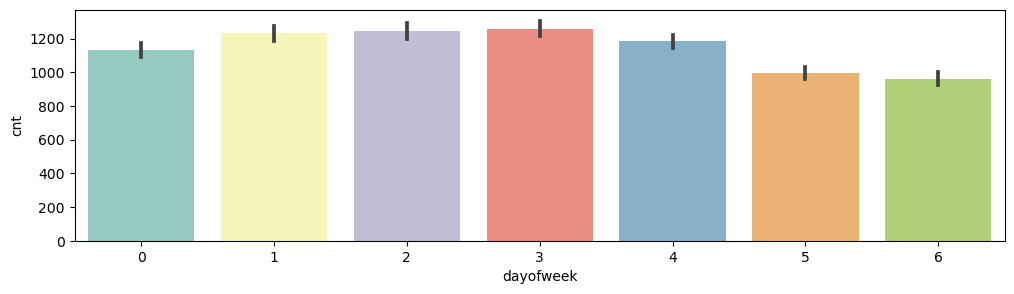

In [58]:
plot_bar(df, 'dayofweek')

## outliers 제거(이상치) 中시그마 이상치 제거
- 정규분포라고 보았을때 양극단 제거 약 0.3%

In [62]:
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)  # 상한값과 하한값 사이의 값

In [73]:
df_out = df[~df.groupby('hour', group_keys=False)['cnt'].apply(is_outliers)] # 시간대별로
print('이상치 제거전:',df.shape)
print('이상치 제거후:', df_out.shape)

이상치 제거전: (17414, 14)
이상치 제거후: (17265, 14)


In [69]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

## 카테고리형(범주형)으로 변경 (weather_code 등)

In [75]:
df_out['weather_code'] = df.out['weather_code'].astype('category')
df_out['season'] = df.out['season'].astype('category')
df_out['year'] = df.out['year'].astype('category')
df_out['month'] = df.out['month'].astype('category')
df_out['hour'] = df.out['hour'].astype('category')

/tmp/ipykernel_32/1671873293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code'] = df.out['weather_code'].astype('category')
/tmp/ipykernel_32/1671873293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season'] = df.out['season'].astype('category')
/tmp/ipykernel_32/1671873293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [76]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [77]:
df_out['season']

/opt/conda/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

## Dummy 더미변수로 변환(연속형)
- 이진으로 변경(딥러닝에 효과)

In [79]:
df_out = pd.get_dummies(df_out, columns=['weather_code','season','year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_out.shape

(17265, 59)

In [85]:
df_y = df_out['cnt']  # 'cnt'를 y로
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)  # column 기준 버리기 (1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)
                                                                # 동일 레코드 추출(동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값)

In [96]:
print('x_train의 구조는:',x_train.shape)
print('y_train의 구조는:',y_train.shape)
print('x_test의 구조는:',x_test.shape)
print('x_test의 구조는:',y_train.shape)

x_train의 구조는: (12085, 57)
y_train의 구조는: (12085,)
x_test의 구조는: (5180, 57)
x_test의 구조는: (12085,)
